# Script for the last plot
av. values along the sampled trajectory vs. stride (comparison between multiple non-informative priors)

- compare `np.mean` with/without removing the initial equilibration step

In [1]:
import os, pandas
import numpy as np
import matplotlib, matplotlib.pyplot as plt

[-0.25  0.    0.25  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25]
[-400.                   inf  400.          200.          133.33333333
  100.           80.           66.66666667   57.14285714   50.
   44.44444444]


/tmp/ipykernel_5860/1161637222.py:11: RuntimeWarning: divide by zero encountered in divide
  x_top_ticks = 100/x_bottom_ticks


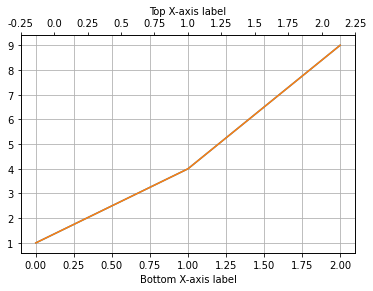

In [2]:
fig, ax_bottom = plt.subplots()

# Plot your data
ax_bottom.plot([0, 1, 2], [1, 4, 9], label='series 1')
ax_bottom.plot([0, 1, 2], [1, 4, 9], label='series 2')
ax_bottom.set_xlabel('Bottom X-axis label')

x_bottom_ticks = ax_bottom.get_xticks()

print(x_bottom_ticks)
x_top_ticks = 100/x_bottom_ticks

print(x_top_ticks)

# Create a second x-axis at the top
ax_top = ax_bottom.twiny()
ax_top.set_xlim(ax_bottom.get_xlim())  # Match limits
ax_top.set_xlabel('Top X-axis label')
ax_top.set_xticks(x_bottom_ticks, x_bottom_ticks)

ax_bottom.grid()

plt.show()

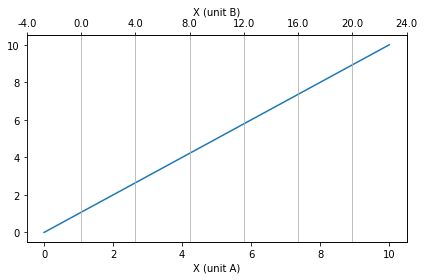

In [18]:
fig, ax_bottom = plt.subplots()

# Plot something on bottom axis
x = np.linspace(0, 10, 100)
y = x  # np.sin(x)
ax_bottom.plot(x, y)
ax_bottom.set_xlabel('X (unit A)')

# Create top axis
ax_top = ax_bottom.twiny()

# Define transformation: e.g., top axis is in unit B = unit A * 2
def bottom_to_top(x):
    return x * 2

def top_to_bottom(x):
    return x / 2

# Set limits and ticks for top axis using transformation
bottom_xlim = ax_bottom.get_xlim()
bottom_xlabels = ax_bottom.get_xticks()
ax_top.set_xlim(bottom_to_top(bottom_xlim[0]), bottom_to_top(bottom_xlim[1]))
ax_top.set_xticks(bottom_to_top(bottom_xlabels), bottom_to_top(bottom_xlabels))
ax_top.set_xlabel('X (unit B)')

plt.grid()
plt.tight_layout()
plt.show()

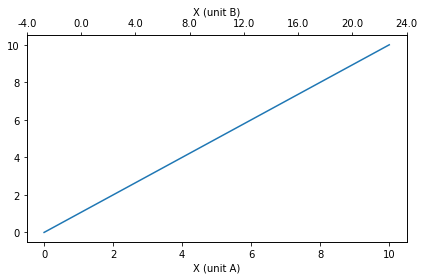

In [20]:
fig, ax_bottom = plt.subplots()

# Example data
x = np.linspace(0, 10, 100)
y = x  # np.sin(x)
ax_bottom.plot(x, y)
ax_bottom.set_xlabel('X (unit A)')

# Create top axis sharing the same x-axis
ax_top = ax_bottom.twiny()

# Get tick positions from bottom axis
bottom_ticks = ax_bottom.get_xticks()

# Define a transformation function: unit B = 2 * unit A
top_labels = bottom_ticks * 2

# Set tick positions on the top axis to match the bottom
# ax_top.set_xticks(bottom_ticks)
ax_top.set_xticks(top_labels)
ax_top.set_xticklabels([f'{val:.1f}' for val in top_labels])
ax_top.set_xlabel('X (unit B)')

plt.tight_layout()
plt.show()

In [12]:
import pandas

In [66]:
class MyData:
    """
    from a pandas dataframe to a dictionary of class instances, without further memory required;
    in this way, you can add further properties to each class instance, beyond those in the pandas dataframe
    
    self.stride = row['stride'] → value is copied, no reference

    self._df = df + property → reference kept, reflects changes

    Defining new attributes as in the following lines will duplicate the data (twice memory will be required)
    indeed if I modify for example a value through MyData instance, the corresponding value
    in the original dataframe will not be modified
    
    for s in list(df.columns):
        setattr(self, s, df[s].loc[label])
    
    so, refer to it as reference-only: to do this we can define it as a method
    in addition, @property has specific advantages when you want an attribute-like interface with dynamic behavior:
    both dynamic computation (as method), still access it like an attribute e.g. obj.stride rather than obj.stride()
    the following lines correspond to what those containing make_getter do in each iteration
    
    @property
    def stride(self):
        return self.df.loc[self.label, 'stride']
    """
    def __init__(self, i, label, df, traj, qs, ene):
        self.i = i
        self.label = label
        self.df = df  # this is just a reference (to the full dataframe), so no further memory is required

        for col in df.columns:  # also this is just a reference (see above)
            def make_getter(col):
                return property(lambda self: df.loc[self.label, col])
            
            setattr(self.__class__, col, make_getter(col))
        
        # these are references (you can check by modifying just one element of that, it is modified also the original one)
        self.traj = traj
        self.n_steps_MC = traj.shape[0]
        self.obs = qs[:, :28]
        self.dkl = qs[:, 28]
        if qs.shape[1] == 30: self.loss = qs[:, 29]
        self.energy = ene

    def get_attributes(self):
        return [s for s in dir(self) if s[:2] != '__']


In [21]:
class Person:
  def __init__(self, fname, lname):
    self.firstname = fname
    self.lastname = lname

  def printname(self):
    print(self.firstname, self.lastname)

#Use the Person class to create an object, and then execute the printname method:

x = Person("John", "Doe")
x.printname()

John Doe


In [28]:
class Person:
    def __init__(self, name, age):
        self.name = name
        self.age = age

    def print_name(self):
        print(self.name, self.age)

class Student(Person):
    def __init__(self, person: Person, student_id, major):
        super().__init__(**person.__dict__)  # Inherit properties
        self.student_id = student_id
        self.major = major

In [30]:
x = Person("John", "Doe")
x.print_name()

John Doe


In [33]:
student = Student(x, 14, 'Chemistry')

student.print_name()

student.major

John Doe


'Chemistry'

In [4]:
%%bash

dir='remote_data'

if [ ! -d "$dir" ]; then
    mkdir "$dir"
fi

if [ -z "$(ls -A "$dir")" ]; then
    sshfs igilardo@frontend2.hpc.sissa.it:/home/igilardo/5_Jeffreys/Results_sampling_ER "$dir"
fi

In [61]:
my_data.get_attributes()

AttributeError: 'MyData' object has no attribute 'get_attributes'

In [14]:
df = pandas.read_csv('remote_data/Result_%s/par_values' % my_code, index_col=0)

In [49]:
df

,jobid,stride,alpha,if_normalize,if_reduce,if_onebyone,dx,which_measure,n_steps,seed,av. acceptance,time
2025_07_09_08_22_06_765219,400,5000,10.0,1,0,0,0.2,2,500000,1,0.014056,40622.122717


In [9]:
my_code = '2025_07_09_08_22_06_765219'

qs = np.load('remote_data/Result_%s/quantities.npy' % my_code)
traj = np.load('remote_data/Result_%s/trajectory.npy' % my_code)
ene = np.load('remote_data/Result_%s/energy.npy' % my_code)

traj.shape

(500001, 28)

In [67]:
my_data = MyData(0, my_code, df, traj, qs, ene)

In [68]:
my_data.get_attributes()

['alpha',
 'av. acceptance',
 'df',
 'dkl',
 'dx',
 'energy',
 'get_attributes',
 'i',
 'if_normalize',
 'if_onebyone',
 'if_reduce',
 'jobid',
 'label',
 'loss',
 'n_steps',
 'n_steps_MC',
 'obs',
 'seed',
 'stride',
 'time',
 'traj',
 'which_measure']

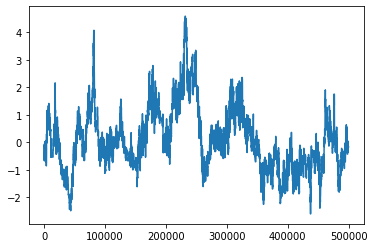

In [72]:
plt.plot(my_data.traj[:, 0])

In [69]:
print(my_data.n_steps, my_data.n_steps_MC)

500000 500001


['alpha',
 'av. acceptance',
 'df',
 'dkl',
 'dx',
 'energy',
 'i',
 'if_normalize',
 'if_onebyone',
 'if_reduce',
 'jobid',
 'label',
 'loss',
 'n_steps',
 'n_steps_MC',
 'obs',
 'seed',
 'stride',
 'time',
 'traj',
 'which_measure']

In [23]:
vars(my_data).keys()

dict_keys(['i', 'label', 'df', 'traj', 'n_steps_MC', 'obs', 'dkl', 'loss', 'energy'])

In [40]:
my_data.df.iloc[0, 0] = 400

my_data.df

,jobid,stride,alpha,if_normalize,if_reduce,if_onebyone,dx,which_measure,n_steps,seed,av. acceptance,time
2025_07_09_08_22_06_765219,400,5000,10.0,1,0,0,0.2,2,500000,1,0.014056,40622.122717


In [45]:
my_data.dkl[0] = 400

In [47]:
qs[:, -2]

array([4.00000000e+02, 2.61355185e-01, 2.61355185e-01, ...,
       2.08128153e+00, 2.08128153e+00, 2.08128153e+00])

In [7]:
qs.shape

(500001, 30)

In [103]:
my_data = {}

for i, ind in enumerate(list(df.index)):
    my_data[i] = MyData(i, ind, df)

my_data[0].stride

10

In [98]:
vars(my_data[0])

{'i': 0,
 'label': 0,
 'df':    stride  length
 0      10      10
 1       2      20
 2       3      30}

In [96]:
df

,stride,length
0,10,10
1,2,20
2,3,30


In [97]:
my_data[0].stride = 5

AttributeError: can't set attribute

[ 2.  4.  6.  8. 10.]


/tmp/ipykernel_7434/4199132110.py:19: RuntimeWarning: divide by zero encountered in divide
  secax.set_xticks(ax.get_xticks(), ['%.2f' % f for f in 1/ax.get_xticks()])


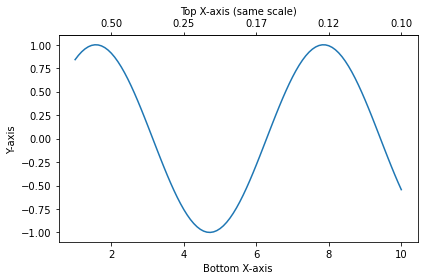

In [141]:
x = np.linspace(1, 10, 100)
y = np.sin(x)

fig, ax = plt.subplots()

# Plot on the primary axis
ax.plot(x, y)
ax.set_xlabel("Bottom X-axis")
ax.set_ylabel("Y-axis")

# Add top x-axis with same ticks
secax = ax.secondary_xaxis('top', functions=(lambda x: x, lambda x: x))
secax.set_xlabel("Top X-axis (same scale)")

xtick_labels = np.array([float(tick.get_text()) for tick in ax.get_xticklabels()[1:-1]])
print(xtick_labels)

# secax.set_xticks(secax.get_xticks(), xtick_labels**2)
secax.set_xticks(ax.get_xticks(), ['%.2f' % f for f in 1/ax.get_xticks()])


plt.tight_layout()
plt.show()

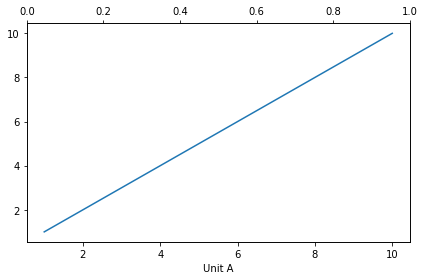

In [118]:
x = np.linspace(1, 10, 100)
y = x  # np.sin(x)

# Create bottom axis
fig, ax_bottom = plt.subplots()
ax_bottom.plot(x, y)
ax_bottom.set_xlabel('Unit A')

# Create top axis with different scale (unit B = 2 * unit A)
ax_top = ax_bottom.twiny()

# Set the top axis limits so that they match bottom axis positions
# If bottom is 0–10 (unit A), then top is 0–20 (unit B)
# a_min, a_max = ax_bottom.get_xlim()
# bottom_ticks = ax_bottom.get_xticks()
# ax_top.set_xlim(a_min, a_max)

# x_ticks = ax_bottom.get_xticks()
# print(x_ticks)

# ax_top.set_xticks(x_ticks, labels=x_ticks)
# # ax_top.set_xticks(bottom_ticks*2, bottom_ticks*2)
# ax_top.set_xlabel('Unit B')

# ax_bottom.grid()
# # plt.grid()
plt.tight_layout()
plt.show()

Text(0.5, 0, '1/x')

/tmp/ipykernel_7434/118371569.py:16: RuntimeWarning: divide by zero encountered in divide
  return 1 / x


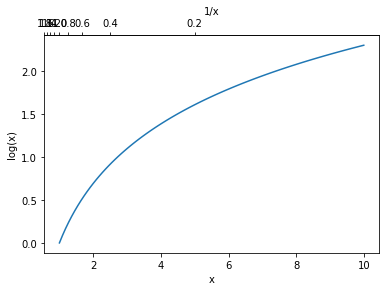

In [ ]:
x = np.linspace(1, 10, 100)
y = np.log(x)

fig, ax = plt.subplots()

# Plot on primary axis
ax.plot(x, y)
ax.set_xlabel("x")
ax.set_ylabel("log(x)")

# Add secondary x-axis on top, with 1/x scale
def forward(x):
    return 1 / x

def inverse(x):
    return 1 / x

secax = ax.secondary_xaxis('top', functions=(forward, inverse))

ax.
secax.set_xlabel("1/x")


In [2]:
import sys, jax.numpy as jnp
# sys.path.append('../../')

from MDRefine import load_data, normalize_observables, minimizer, unwrap_2dict, loss_function
from Functions.basic_functions_bayesian import local_density, run_Metropolis
from Functions.basic_functions_bayesian import compute, compute_single

### built functions

In [3]:
def detect_convergence(time_series, threshold_fact = 50., which_method = 1, if_plot = False):
    """
    There are several ways to detect convergence of a time series (beyond visual inspection),
    for example you can compute averages on time windows and then compare them.
    Here, `threshold_fact` is not required.

    Alternatively (`which_method = 2`), we can compute the variation of the cumulative averages
    and check where it goes under a threshold. This variation is equal to:

    $ \delta m(j) = m(j + 1) - m(j) = ... = 1/(j + 1) * (x_{j+1} - m(j))$

    where $m(j)$ is the cumulative average up to frame n. $j$.
    """

    time_series = np.asarray(time_series)

    if which_method == 1:
        std = np.std(time_series[-5000:])
        diffs = np.abs(time_series - time_series[-1])/std
        wh = np.argwhere(diffs < 7)

        b = ( len(wh)/len(diffs) > 0.99 )
        # this is to avoid sporadic deviations above the threshold will affect the convergence detection

        if b : position = 0
        else : position = wh[np.where(np.ediff1d(wh) != 1)][-1][0]

        if if_plot:
            plt.figure()
            plt.plot(diffs)
            plt.plot([0, len(diffs)], 7*np.ones(2), 'k')

        return position

    elif which_method == 2:
        cumulative_avg = np.cumsum(time_series) / np.arange(1, len(time_series) + 1)
        diff = np.ediff1d(cumulative_avg)

        my_max = np.max(diff)
        threshold = my_max/threshold_fact

        wh = np.argwhere(diff < threshold)
        b = ( wh[-1] == len(diff) - 1 )[0]

        if if_plot:
            plt.figure()
            plt.plot(diff)
            plt.plot([0, len(diff)], threshold*np.ones(2))
            plt.title('diff')

        if b :
            position = wh[np.where(np.ediff1d(wh) != 1)][-1][0]
            print('convergence found at %s' % position)
            return position
        else:
            print('convergence not detected')
            return None 


In [11]:
def my_mean(time_series, if_detect_convergence = False):
    if not if_detect_convergence:
        my_avs = np.mean(time_series, axis=0)
    else:
        my_avs = []

        for i in range(time_series.shape[1]):
            ind = detect_convergence(time_series[:, i])
            my_avs.append(np.mean(time_series[ind:, i]))

        my_avs = np.array(my_avs)
    return my_avs

### load arrays

In [6]:
path = 'remote_data/'  # '../Results_sampling_ER/'

In [7]:
def load_and_fix_dataframe(path):

    file_list = list(np.sort(os.listdir(path)))
    file_list.remove('normalized_values')

    df_pars = []

    for name in file_list[1:]:
        print(name)
        df_pars.append(pandas.read_csv(path + name + '/par_values', index_col=0))

    df_pars = pandas.concat(df_pars, ignore_index=False).iloc[2:]

    ### STEP 2

    n_obs = []

    for ind in df_pars.index:
        print(ind)
        n_obs.append(np.load(path + 'Result_' + ind + '/trajectory.npy', mmap_mode='r').shape[1])

    df_pars['n_obs'] = n_obs

    ### STEP 3

    new_names = ['alpha', 'if_normalize', 'if_reduce', 'if_Jeffreys', 'dx']
    old_names = ['alpha ER', 'normalize?', 'reduce?', 'Jeffreys?', 'dlambda']

    for i in range(len(new_names)):
        df_pars[old_names[i]] = df_pars[old_names[i]].fillna(df_pars[new_names[i]])
        df_pars = df_pars.drop(columns=[new_names[i]])

    new_names = ['Jeffreys?']
    old_names = ['which_measure']

    for i in range(len(new_names)):
        df_pars[old_names[i]] = df_pars[old_names[i]].fillna(df_pars[new_names[i]])
        df_pars = df_pars.drop(columns=[new_names[i]])

    whole_df_pars = df_pars
    del df_pars

    # old if_onebyone Nan values correspond to 0 (False), since I implemented this later
    whole_df_pars.loc[np.isnan(whole_df_pars['if_onebyone']), 'if_onebyone'] = 0

    return whole_df_pars

In [8]:
whole_df_pars = load_and_fix_dataframe(path)

Result_2025_05_15_17_44_10_845681
Result_2025_05_15_17_44_12_194451
Result_2025_05_15_17_52_31_914826
Result_2025_05_15_17_52_36_670959
Result_2025_05_15_18_40_13_500364
Result_2025_05_15_18_41_14_071270
Result_2025_05_15_18_43_28_270804
Result_2025_05_15_18_43_51_327121
Result_2025_05_15_18_56_54_397682
Result_2025_05_15_20_06_29_437759
Result_2025_05_16_19_41_26_084836
Result_2025_05_16_19_43_41_404477
Result_2025_05_16_20_10_53_613148
Result_2025_05_16_20_32_51_324995
Result_2025_05_16_22_56_57_222520
Result_2025_05_17_01_59_56_237682
Result_2025_05_28_17_49_28_796056
Result_2025_05_28_18_04_06_983061
Result_2025_05_28_18_55_50_399304
Result_2025_05_29_08_49_27_427206
Result_2025_05_29_08_52_20_959036
Result_2025_05_29_17_01_51_621759
Result_2025_05_29_17_04_36_623758
Result_2025_05_29_17_55_06_717604
Result_2025_05_29_18_00_35_501063
Result_2025_05_29_18_04_57_737569
Result_2025_05_29_18_53_31_174209
Result_2025_05_29_19_39_19_914627
Result_2025_05_29_19_56_47_436295
Result_2025_05

In [9]:
seed = 1.

# df_pars = df_pars[(df_pars['alpha ER'] == 10.) & (df_pars['reduce?'] == 0.) & (df_pars['n_obs'] == 28) & (df_pars['n_steps'] == int(1e5))]
df_pars = whole_df_pars.query(f'`alpha ER` == 10 and `reduce?` == 0 and n_obs == 28 and n_steps == {int(5e5)}' \
    f'and if_onebyone == 0. and seed == {seed}')

df_pars = df_pars.sort_values(by='stride')

my_types = ['plain', 'J', 'Dir', 'av']

inds = {}
strides = {}

for i, s in enumerate(my_types):
    inds[s] = df_pars[df_pars['which_measure'] == float(i)].index
    strides[s] = df_pars[df_pars['which_measure'] == float(i)]['stride']

for s in strides.keys(): strides[s] = strides[s].astype(np.int64)

df_pars['time'] /= 3600

df_pars

,stride,alpha ER,normalize?,reduce?,dlambda,n_steps,av. acceptance,jobid,if_onebyone,time,which_measure,seed,n_obs
2025_07_08_18_04_48_344998,5.0,10.0,1.0,0.0,0.2,500000.0,0.059459,16884762.0,0.0,11.937816,2.0,1.0,28
2025_07_08_18_04_48_346556,5.0,10.0,1.0,0.0,0.2,500000.0,0.061971,16884763.0,0.0,11.992725,1.0,1.0,28
2025_07_08_19_25_18_778246,5.0,10.0,1.0,0.0,0.2,500000.0,0.023766,16884771.0,0.0,10.454162,3.0,1.0,28
2025_07_08_19_25_18_858189,5.0,10.0,1.0,0.0,0.2,500000.0,0.13535,16884770.0,0.0,11.653705,0.0,1.0,28
2025_07_08_18_30_18_815147,10.0,10.0,1.0,0.0,0.2,500000.0,0.062115,16884765.0,0.0,11.038101,1.0,1.0,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025_07_08_17_07_37_825441,5000.0,10.0,1.0,0.0,0.2,500000.0,0.014696,16884150.0,0.0,3.267581,3.0,1.0,28
2025_07_08_16_38_49_779152,5000.0,10.0,1.0,0.0,0.2,500000.0,0.169877,16884146.0,0.0,2.942859,0.0,1.0,28
2025_07_08_16_34_46_346598,5000.0,10.0,1.0,0.0,0.2,500000.0,0.014056,16884143.0,0.0,3.414593,2.0,1.0,28
2025_07_09_08_20_57_209389,5000.0,10.0,1.0,0.0,0.2,500000.0,0.014696,16884910.0,0.0,11.555301,3.0,1.0,28


In [51]:
trajs = {}
qs = {}
mus = {}
stds = {}

mus_True = {}
stds_True = {}

for s in my_types:

    trajs[s] = []
    qs[s] = []
    mus[s] = []
    stds[s] = []

    mus_True[s] = []
    stds_True[s] = []

    for ind in inds[s]:
        trajs[s].append(np.load(path + 'Result_' + ind + '/trajectory.npy', mmap_mode='r'))
        qs[s].append(np.load(path + 'Result_' + ind + '/quantities.npy', mmap_mode='r'))
        mus[s].append(my_mean(qs[s][-1], False))
        stds[s].append(my_mean(qs[s][-1], False))

        mus_True[s].append(my_mean(qs[s][-1], True))
        stds_True[s].append(my_mean(qs[s][-1], True))

    mus[s] = np.array(mus[s])
    stds[s] = np.array(stds[s])

    mus_True[s] = np.array(mus_True[s])
    stds_True[s] = np.array(stds_True[s])

In [49]:
j = 13

s = 'J'

time_series = qs[s][j]

plt.plot(time_series[:, 28])

print('stride: ', strides[s][j])

m1 = np.mean(time_series[:, 28])

ind = detect_convergence(time_series[:, 28])
m2 = np.mean(time_series[ind:, 28])

print(m1, m2)

plt.plot([0, time_series.shape[0]], m1*np.ones(2))
plt.plot([0, time_series.shape[0]], m2*np.ones(2))

KeyError: 'J'

In [54]:
mus.keys()

dict_keys(['plain', 'J', 'Dir', 'av'])

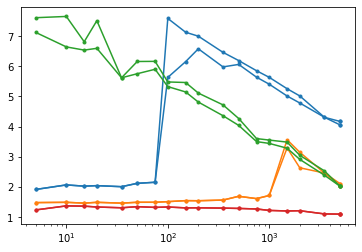

In [56]:
n_obs = 28
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']

for i, s in enumerate(my_types):
    plt.plot(strides[s], mus[s][:, n_obs], '.-', label=s, c=colors[i])
    plt.plot(strides[s], mus_True[s][:, n_obs], '.-', label=s, c=colors[i])
    

plt.xscale('log')

In [16]:
mus['plain'].shape

(19, 30)